In [1]:
!pip install qiskit qiskit-ibm-runtime pylatexenc qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.8 MB/s eta 0:00:00
   ━━━━━━

balanced
[1 3 5]


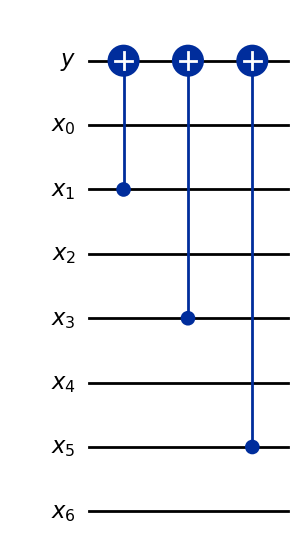

In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np
# 임의의 n-qubit 도이치-조사 오라클 회로를 구현하는 함수
def dj_oracle_random(n):
    qy = QuantumRegister(1, 'y')
    qx = QuantumRegister(n, 'x')
    qc = QuantumCircuit(qy, qx) # qc 라는 이름의 n+1큐비트 양자 회로 객체를 생성

    np.random.seed()
    condition = np.random.choice(['constant','balanced'])
    print(condition)

    if condition == 'constant' :  # construct a random constant f(x) -> fx = 0이거나 fx = 1
      x = np.random.randint(2)
      print(x)
      if(x == 1): # 오라클 서킷 적용
        qc.x(qy)                  # if x==1 f(x)=1, if x==0 f(x)=0

    else :                        # construct a random balanced f(x)
      k = np.random.randint(1,n+1)   # make sure s is not all 0's
      a = np.random.permutation(n) # 랜덤 순열
      a = a[:k]                    # a = k개의 n 보다 작은 정수들의 집합
      print(a)
      for i in a:
       qc.cx(qx[i], qy)            # 제어 큐비트 qx[x], 타겟 큐비트 qy 인 CX(CNOT) gate

    qc.name = 'D-Jozsa'
    return qc              # qc 객체를 반환

circuit = dj_oracle_random(7) # 함수를 호출하여 회로를 표현하는 객체를 생성
circuit.draw(output='mpl')

balanced
[1 4 6 3 0]


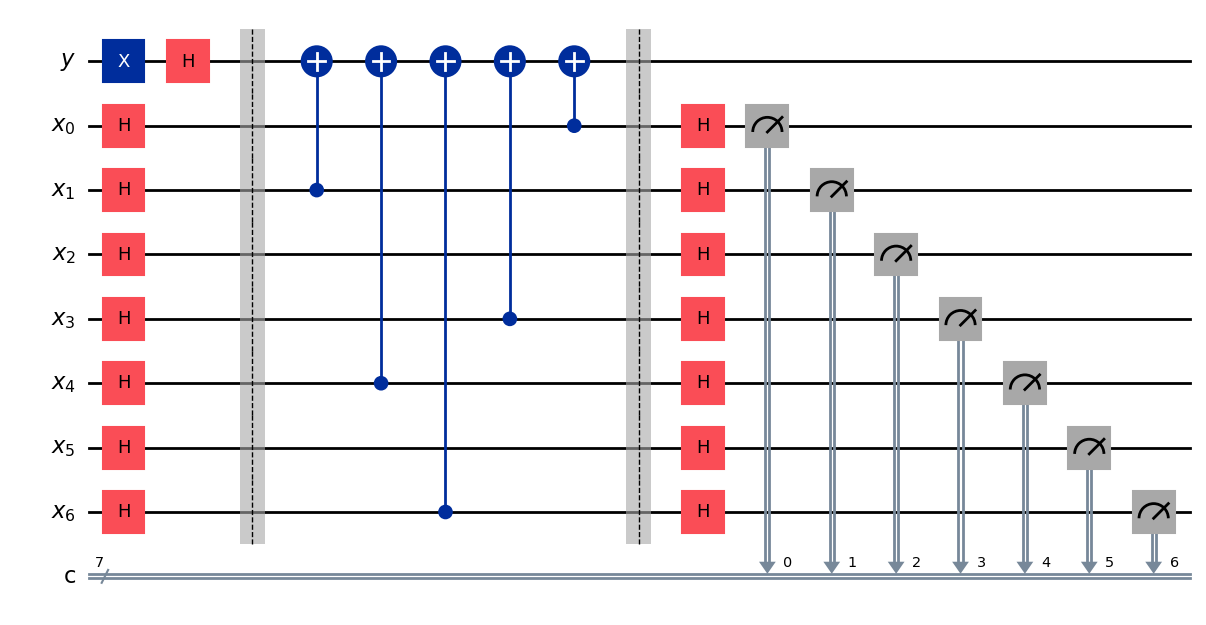

In [23]:
# 도이치-조사 오라클 함수를 호출하여 도이치-조사 회로를 circuit 이라는 이름의 객체로 구현
n = 7
qx = QuantumRegister(n,'x')  # n 큐비트의 양자 레지스터 객체를 qx 라는 이름으로 생성, 회로에는 'x'로 표시
qy = QuantumRegister(1,'y')  # 1 큐비트의 양자 레지스터 객체를 qy 라는 이름으로 생성, 회로에는 'y'로 표시
c = ClassicalRegister(n,'c') # n 비트의 고전 레지스터 객체를 c 라는 이름으로 생성, 회로에는 'c'로 표시
circuit = QuantumCircuit(qy, qx, c) # qy,qx,c 를 가지는 양자 회로를 circuit 이라는 이름의 객체로 생성
for i in range(qx.size):     # qx 의 모든 큐비트에 H gate 적용
  circuit.h(qx[i])
circuit.x(qy)                # qy 큐비트에 X gate -> qy 큐비트 상태가 |1> 이 됨
circuit.h(qy)                # qy 큐비트에 H gate -> qy 큐비트 상태가 |-> 이 됨
circuit.barrier()
# dj_oracle_random() 을 호출하여 오라클 회로를 circuit 에 추가
circuit.compose(dj_oracle_random(n), inplace=True)

circuit.barrier()
for i in range(qx.size):     # qx 의 모든 큐비트에 H gate 적용
  circuit.h(qx[i])
circuit.measure(qx, c)                          # qx 레지스터의 모든 큐비트들을 측정하여 c 레지스터로 읽는 회로를 구현
circuit.draw(output='mpl') # circuit 회로를 matplot library 형식의 그림 화일로 출력

In [24]:
# AerSimulator 를 이용하여 circuit 회로를 측정한 결과를 출력
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)

isa_circuit = pm.run(circuit)           # fill in ()
sampler = Sampler(mode=aer_sim)
job = sampler.run([isa_circuit], shots=1)  # fill in []
result = job.result()
count = result[0].data.c.get_counts()   # fill in
print (count)

{'1011011': 1}


In [26]:
n_zeros = n*'0'

if (n_zeros in count) :
  answer = 'constant'             # fill in
else :
  answer = 'balanced'             # fill in
print(f'f(x) is a {answer} function.')

f(x) is a balanced function.
